## Hotel Reservation Cancellation Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {"figure.figsize":(11.7, 8.27)})

In [2]:
df_original = pd.read_csv('hotel_bookings.csv')

In [3]:
df_original.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# menerapkan batasan data (variabel tertentu saja dan 5000 row pertama saja)
# saya pisah df original dengan df yang sudah difilter karena barangkali diperlukan lagi
df = df_original[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']][:5000]

In [5]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


### **A. EDA** (25 poin)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [7]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [8]:
# ratio dari missing value
df['country'].isnull().sum() / len(df) * 100

0.04

#### Analisa

Disini dapat dilihat bahwa ada dua row yang memiliki column country yang kosong. Tapi rasio dibanding data, missing valuenya sangat kecil.

In [9]:
df.describe().round() # menunjukan deskripsi untuk features yang numerik saja

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
std,0.0,2.0,0.0,0.0,1.0,14.0,0.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
max,1.0,55.0,10.0,2.0,17.0,122.0,2.0,4.0


In [10]:
df.describe(include='all')

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,4998,5000,5000,5000,5000.000000,5000,5000.000000,5000,5000.000000,5000.000000
unique,1,NaN,NaN,NaN,NaN,5,56,6,3,9,NaN,3,NaN,4,NaN,NaN
top,Resort Hotel,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,A,NaN,No Deposit,NaN,Transient,NaN,NaN
freq,5000,NaN,NaN,NaN,NaN,3418,3174,2156,3657,3167,NaN,4461,NaN,3699,NaN,NaN
mean,NaN,0.459600,1.969800,0.115600,0.014800,NaN,NaN,NaN,NaN,NaN,0.207200,NaN,1.772000,NaN,0.093800,0.602000
std,NaN,0.498415,1.566326,0.444833,0.122409,NaN,NaN,NaN,NaN,NaN,0.612489,NaN,13.545358,NaN,0.292948,0.823245
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
50%,NaN,0.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
75%,NaN,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,1.000000


#### Distribusi Jenis Hotel

In [11]:
df['hotel'].value_counts()

Resort Hotel    5000
Name: hotel, dtype: int64

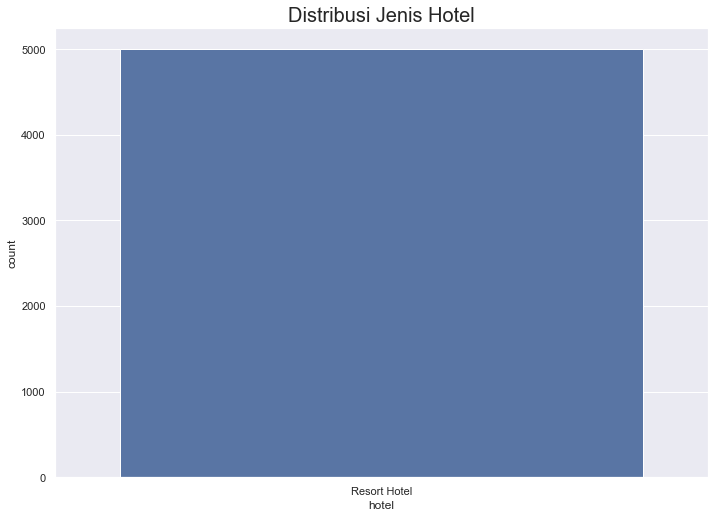

In [12]:
plt.title("Distribusi Jenis Hotel", fontdict = {'fontsize':20})
ax = sns.countplot(x = "hotel", data = df)

#### Analisa

Bisa dilihat bahwa 5000 data pertama hanya menginclude data dari Resort Hotel saja dan tidak ada data City Hotel sama sekali.

#### Feature numerical mana yang paling penting?

In [13]:
df.corr().round(4)

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
is_canceled,1.0000,0.0452,0.0247,-0.0295,-0.1816,-0.1134,-0.2953,-0.0831
adults,0.0452,1.0000,0.0093,0.0013,-0.0233,-0.0176,-0.0004,-0.0081
children,0.0247,0.0093,1.0000,0.0016,0.0655,-0.0340,0.0519,0.0355
babies,-0.0295,0.0013,0.0016,1.0000,0.0605,-0.0158,0.0338,0.1756
booking_changes,-0.1816,-0.0233,0.0655,0.0605,1.0000,0.0161,0.0634,0.0307
days_in_waiting_list,-0.1134,-0.0176,-0.0340,-0.0158,0.0161,1.0000,-0.0419,-0.0957
required_car_parking_spaces,-0.2953,-0.0004,0.0519,0.0338,0.0634,-0.0419,1.0000,0.1109
total_of_special_requests,-0.0831,-0.0081,0.0355,0.1756,0.0307,-0.0957,0.1109,1.0000


In [14]:
df.corr()["is_canceled"].sort_values()

required_car_parking_spaces   -0.295316
booking_changes               -0.181608
days_in_waiting_list          -0.113426
total_of_special_requests     -0.083072
babies                        -0.029543
children                       0.024678
adults                         0.045200
is_canceled                    1.000000
Name: is_canceled, dtype: float64

In [15]:
df.corr()["is_canceled"].abs().sort_values(ascending = False) # digunakan function abs() untuk mendapatkan angka absolut

is_canceled                    1.000000
required_car_parking_spaces    0.295316
booking_changes                0.181608
days_in_waiting_list           0.113426
total_of_special_requests      0.083072
adults                         0.045200
babies                         0.029543
children                       0.024678
Name: is_canceled, dtype: float64

#### Analisa

<img src="https://miro.medium.com/max/466/1*Qz_gwy4ZaSZuOpl3IyO2HA.png" width = 50% height = 50%>

Credit gambar: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

Dari list korelasi diatas kita bisa tentukan bahwa required_car_parking_spaces merupakan **numerical feature** terpenting. Korelasi disini merupakan korelasi negatif, jadi semakin tinggi parking space yang dibutuhkan customer, maka semakin tinggi tingkat cancellation. Tapi, karena size korelasinya masih 0.29, ini masih bisa dibilang korelasi yang sangat lemah.

Setelah itu, tingkat korelasi tertinggi diikuti oleh booking_changes, dan days_in_waiting_list, dan total_of_special_request. Tapi korelasi disini bisa dibilang tidak meaningful karena tingkatnya sangat rendah.

### Darimanakah customer-customer hotel berasal?

Perlu diingat bahwa seperti yang disebut di studi bahwa data source dari dataset ini berasal dari dua hotel di Portugal. Jadi bisa asumsikan bahwa akan ada banyak customer yang berasal dari Portugal juga.

In [16]:
df['country'].value_counts()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
POL      28
USA      28
CHE      26
RUS      23
ITA      23
BRA      18
AUT      12
ROU      12
LUX      10
FIN       9
SWE       8
LVA       6
DNK       6
ARG       6
CHN       5
NOR       5
AUS       4
IND       3
LTU       3
CZE       3
KOR       3
TUR       2
MAR       2
DZA       2
OMN       2
MOZ       2
SVN       2
MEX       2
CHL       2
ZAF       2
CRI       2
EST       2
BWA       1
SMR       1
HUN       1
PRI       1
SRB       1
CYM       1
GRC       1
BLR       1
UKR       1
ALB       1
AGO       1
ISR       1
ZMB       1
ZWE       1
CPV       1
Name: country, dtype: int64

Text(0, 0.5, 'Count')

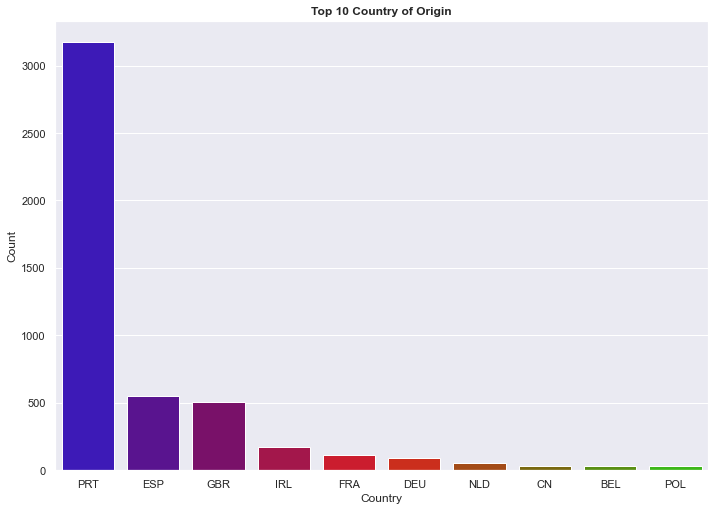

In [17]:
sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

#### Analisa

Jadi dari sini kita bisa lihat bahwa sesuai perkiraan, kebanyakan booking berasal dari Portugal, diikuti oleh Spanyol, Inggris, Irlandia, Prancis, Jerman, Belanda, China, Belgia, dan Polandia. Tapi banyak sekali negara yang lain juga.

#### Segmen Pasar

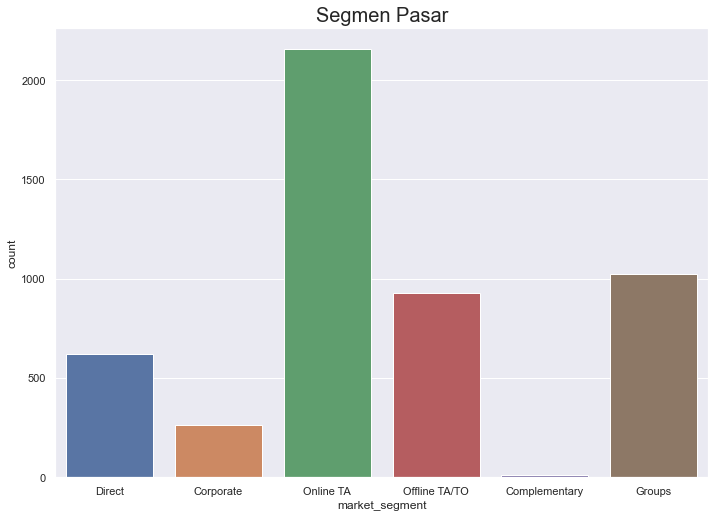

In [18]:
plt.title("Segmen Pasar", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", data = df)

Kebanyakan customer memilih untuk melakukan booking lewat Online Travel Agent, diikuti oleh booking secara grup, lalu offline Travel Agent, diikuti lagi oleh yang lain.

Disini kita bisa lihat bahwa customer hotel di Eropa sudah sangat terbiasa untuk melakukan pemesanan hotel melalui media online, mengalahkan cara yang lama yaitu antara datang langsung ke hotel atau melewati offline travel agent. 

Jadi sangat penting untuk hotel untuk menjalin kerjasama dengan online travel agents juga, dengan cara melakukan deal eksklusivitas (hanya ada di satu agent contohnya) tapi hotel bisa mendapatkan potongan fee, atau placement di search yang lebih tinggi.

Karena jumlah customer yang melakukan pemesananan online sangat dominan, cara' ini harus dilakukan untuk sebuah hotel tetap bisa survive.

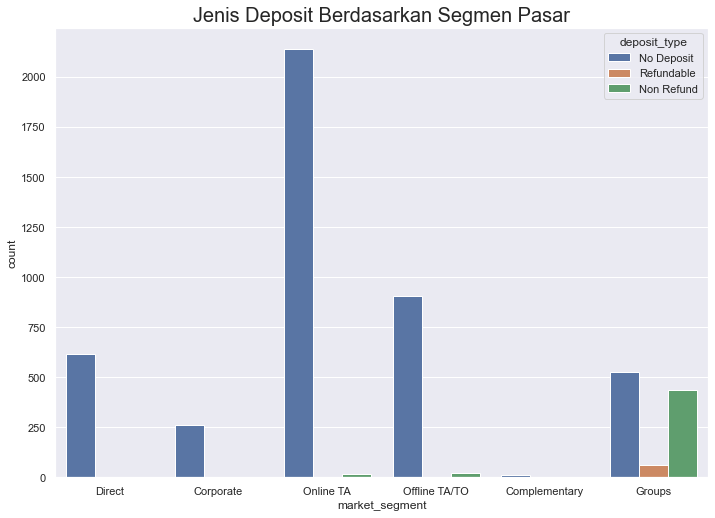

In [19]:
plt.title("Jenis Deposit Berdasarkan Segmen Pasar", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

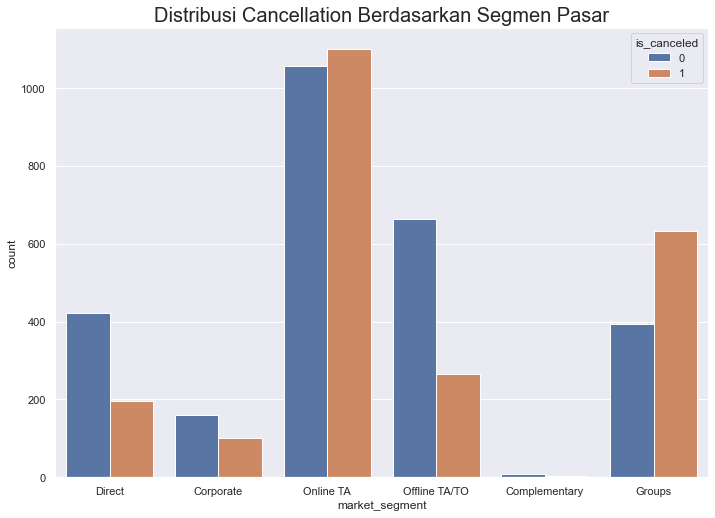

In [20]:
plt.title("Distribusi Cancellation Berdasarkan Segmen Pasar", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

#### Analisa Deposit Type berdasarkan segmen pasar

Kebanyakan dari booking tidak menggunakan non-refundable deposit, bahkan tidak memakai deposit sama sekali. Kecuali di tipe segmen Groups, dengan tingkat non-refundable/refundable deposit yang paling tinggi dari semua segmen. Online dan Offline TA kadang-kadang memakai deposit jenis non-refundable.

Bisa diasumsi dari countplot pertama bahwa groups akan memiliki cancellation rate yang lebih rendah, karena kebanyakan deposit typenya non-refundable.

#### Analisa Cancellation Rate berdasarkan segmen pasar

- Tingkat cancellation online TA dan group melebihi angka 50%.
- Offline TA memiliki cancellation rate yang jauh lebih rendah dan online TA.
- Direct segment memiliki cancellation rate yang paling rendah.
- Corporate booking memiliki cancellation rate yang relatif dibanding asumsi (secara logika booking yang dilakukan oleh perusahaan semestinya lebih di-planning dan lebih jarang dicancel).
- Group cancellation rate mengagetkannya sangat tinggi, walaupun tipe depositnya kebanyakan non-refundable.

Cancellation rate dari online TA yang tinggi juga masuk akal karena melakukan online booking sangatlah mudah, bahkan tanpa deposit.

Cancellation rate dari groups bisa dijelaskan karena walaupun deposit typenya kebanyakan non-refundable, tapi sifat booking secara group akan menyebabkan kemungkinan ada seseorang dari group tersebut yang tidak bisa ikut lebih tinggi. Dan juga deposit dibayar secara kelompok, jadi mungkin jumlahnya tidak terlalu besar untuk setiap individu yang ikut.

Ekspektasi saya adalah direct booking dan corporate booking akan memiliki cancellation rate yang lebih rendah, ini mungkin bisa dijelaskan karena di ujian ini kita hanya menggunakan 5000 data pertama, dan jika menggunakan semua data mungkin bisa mendapatkan angka yang lebih mendekati ekspektasi.
Karena secara logika direct booking akan lebih jarang dicancel secara otomatis karena customer sudah datang terlebih dahulu ke lokasi, dan bukan dilakukan dari jauh atau bahkan dari negara lain. Untuk coporate booking, biasanya dilakukan dengan persiapan yang lebih matang dan biasanya bukan untuk liburan melainkan kerja. Jadi karena customer datang untuk business trip, semestinya tingkat cancellation juga lebih rendah dibanding untuk liburan biasa.

#### Total cancellation dan rasio cancellation

In [21]:
total_cancelations = df["is_canceled"].sum()
rel_cancel = total_cancelations / df.shape[0] * 100

print(f"Total cancellation : {total_cancelations}")
print(f"Rasio cancellation: {total_cancelations:,} ({rel_cancel:.0f} %)")

Total cancellation : 2298
Rasio cancellation: 2,298 (46 %)


Hampir setengah dari customer yang melakukan booking mengancel booking tersebut.

#### Deposit Type dan Korelasinya ke Cancellation

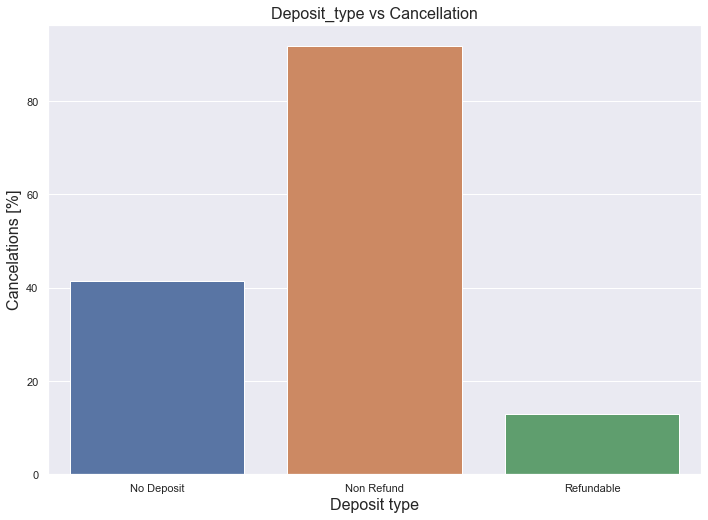

In [22]:
# group data berdasarkan deposit_type:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Deposit_type vs Cancellation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [23]:
df.groupby("deposit_type")["is_canceled"].mean()

deposit_type
No Deposit    0.415154
Non Refund    0.918239
Refundable    0.129032
Name: is_canceled, dtype: float64

#### Analisa

Bisa dilihat bahwa 91 persen dari customer yang melakukan deposit non-refundable melakukan cancellation. Ini merupakan sesuatu yang sangat aneh, karena secara logika customer yang telah membayar deposit non_refundable akan lebih jarang melakukan cancellation. Tapi faktanya di dataset ini tidak begitu.

Pastinya segmen pasar Groups yang melakukan deposit non-refundable dengan rasio tertinggi memiliki efek yang besar terhadap grafik ini.

## Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [25]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

#### Menggabungkan data adults + children + babies menjadi total_customer

In [26]:
# untuk membuat data lebih simpel, total_customer dibuat dengan total orang di satu booking
df["total_customer"] = df["adults"] + df["children"] + df["babies"]

#### Menambahkan feature boolean "is_family"

In [27]:
# untuk menunjukan bahwa suatu booking memiliki anak-anak atau tidak, saya tambahkan feature is_family

# jika membawa bayi atau anak, is_family = true
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [28]:
df["is_family"] = df.apply(family, axis = 1)

In [29]:
# drop adults, children, babies karena sudah ada di is_family dan total_customers
df.drop(columns = ["adults", "children", "babies"], inplace = True)

In [30]:
df["hotel"].value_counts()

Resort Hotel    5000
Name: hotel, dtype: int64

In [31]:
# drop hotels karena cuma ada satu hotel, dan country karena bisa membuat model overfitting
df.drop(columns = ["hotel", "country"], inplace = True)

In [32]:
df["meal"].value_counts(normalize = True)

BB           0.6836
HB           0.2074
FB           0.0638
Undefined    0.0424
SC           0.0028
Name: meal, dtype: float64

In [33]:
df.columns

Index(['is_canceled', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'is_family'],
      dtype='object')

In [34]:
df.isna().sum()

is_canceled                    0
meal                           0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
total_customer                 0
is_family                      0
dtype: int64

In [35]:
# library untuk preprocessing

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
# feature numerical sama categorical saya pisah terlebih dahulu

num_features = ["total_customer","days_in_waiting_list", "required_car_parking_spaces","total_of_special_requests"]

cat_features = ["meal","market_segment", "distribution_channel", "reserved_room_type", "deposit_type", 
                "customer_type", "is_family"]

# Separate features and predicted value
features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]

# untuk numerical features
num_transformer = SimpleImputer(strategy="constant")

# untuk categorical features
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# gabungkan keduanya
transformer = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [37]:
#test
transformer.fit_transform(df)

array([[2., 0., 0., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [2., 0., 0., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 1., 0.]])

### Split Data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    stratify=y,
    random_state = 1
)

### Benchmark Selection

In [40]:
#library

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report,recall_score
from sklearn.model_selection import KFold, cross_val_score

In [41]:
# model" yang akan digunakan:
base_models = [("DT_model", DecisionTreeClassifier(random_state = 2021)),
               ("RF_model", RandomForestClassifier(random_state = 2021)),
               ("LR_model", LogisticRegression(random_state = 2021))]

# split data ke 4 kfold untuk cross validation
# untuk memastikan distribusi data random, lakukan shuffle
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=2021)

# Preprocessing, fitting, prediksi untuk setiap model:
for name, model in base_models:
    # masukan preprocessing data ke pipeline:
    model_steps = Pipeline(steps=[('preprocessor', transformer),
                              ('model', model)])
    
    # cv score untuk setiap model
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuracy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    

DT_model cross validation accuracy score: 0.7258 +/- 0.0135 (std) min: 0.7128, max: 0.744
RF_model cross validation accuracy score: 0.7244 +/- 0.0147 (std) min: 0.7104, max: 0.7448
LR_model cross validation accuracy score: 0.6938 +/- 0.0153 (std) min: 0.6728, max: 0.7096


Disini model Decision Tree memiliki akurasi cv tertinggi, tapi tipis dengan RF.

In [42]:
# model" yang akan digunakan:
base_models = [("DT_model", DecisionTreeClassifier(random_state = 2021)),
               ("RF_model", RandomForestClassifier(random_state = 2021)),
               ("LR_model", LogisticRegression(random_state = 2021))]

# split data ke 4 kfold untuk cross validation
# untuk memastikan distribusi data random, lakukan shuffle
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=2021)

# Preprocessing, fitting, prediksi untuk setiap model:
for name, model in base_models:
    # masukan preprocessing data ke pipeline:
    model_steps = Pipeline(steps=[('preprocessor', transformer),
                              ('model', model)])
    
    # cv score untuk setiap model
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="precision",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation precision score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    

DT_model cross validation precision score: 0.68 +/- 0.0229 (std) min: 0.6471, max: 0.7076
RF_model cross validation precision score: 0.6797 +/- 0.0258 (std) min: 0.6427, max: 0.7068
LR_model cross validation precision score: 0.6571 +/- 0.0241 (std) min: 0.6291, max: 0.6891


#### Precision

Ada **2 jenis kesalahan** yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:
>* Model memprediksi user akan *cancel booking* (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.
>* Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user *cancel booking* (membatalkan pesanan).  

Tapi berhubung di konteks bisnis perhotelan, apabila pengunjung diasumsikan tidak cancel, maka pihak hotel akan menyiapkan banyak hal untuk kedatangan mereka:
>* Menghubungi pengunjung terkait kapan perkiraan datang ke hotel,
>* Membersihkan, merapikan, dan menyiapkan kamar sesuai pesanan pengunjung,
>* Menyiapkan makanan dan minuman untuk menyambut kedatangan pengunjung,
>* Menolak pengunjung lain yang memesan kamar yang telah dipesan (*booked room*), dan
>* Memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan.  

Karena ini, jenis kesalahan yang paling berpengaruh secara finansial adalah jenis prediksi is_canceled positif. (Tipe kesalahan pertama, di list diatas). Jadi saya memutuskan untuk memakai jenis scoring precision, dibandingkan recall atau f1_score atau akurasi.

Tapi, model yang terbaik tetap tidak berubah, yaitu Decision Tree.

## Hyperparameter Tunning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# lakukan gridsearch untuk decision tree classifier, dengan scoring precision karena alasan yang ditulis diatas.

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', DecisionTreeClassifier())])

kfold = KFold(n_splits=5)

parameters = {
    'model__criterion' : ['gini', 'entropy'],
    'model__min_samples_split' : [2,4,6,8],
    'model__min_samples_leaf': [1,2,3,4,5],
    'model__max_features' : ['auto', 'sqrt']
}

grid_search_dtc = GridSearchCV(estimator, param_grid=parameters,
                          cv=5, scoring='precision', verbose=True, n_jobs =-1)

grid= GridSearchCV(estimator,param_grid=parameters,cv=kfold,scoring='precision',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='constant'),
                                                                         ['total_customer',
                                                                          'days_in_waiting_list',
                                                                          'required_car_parking_spaces',
                                                                          'total_of_special_requests']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fil

In [45]:
# print best parameters dari grid search diatas
grid.best_params_

{'model__criterion': 'entropy',
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 6}

In [46]:
grid.best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['total_customer',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ig

In [47]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       540
           1       0.68      0.72      0.70       460

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [48]:
# save model

import pickle

estimator=Pipeline([('preprocess',transformer),('model',DecisionTreeClassifier())])
estimator.fit(X_train,y_train)

pickle.dump(estimator,open('final_model.sav','wb'))

In [49]:
# save hasil tunning

model_final=grid.best_estimator_.fit(X_train,y_train)

pickle.dump(model_final,open('final_tunning.sav','wb'))

### Summary dari Tuning

Setelah dilakukan tuning, bisa dilihat bahwa performa naik secara kecil dari dari 0.68 ke 0.69.

## Kesimpulan Akhir

Dari 3 model yang dicoba, model yang memiliki akurasi dan presisi tertinggi adalah decision tree, maka dari itu saya memilih decision tree untuk ditune lagi hyperparameternya. Dari situ model mencapai kenaikan yang cukup kecil. Tapi dibanding model yang lain saya tetap memilih model decision tree untuk memprediksi booking cancellation. 